# Sales Analysis


#### Import Necessary Libraies

In [5]:
import pandas as pd
import os

#### Task#1:Merge the 12 months of sales data into a single CSV file.

In [6]:
df= pd.read_csv("C:/Users/whx12/Desktop/Python/python dataset/Pandas-Data-Science-Tasks-KeithGalli/Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
files=[file for file in os.listdir("C:/Users/whx12/Desktop/Python/python dataset/Pandas-Data-Science-Tasks-KeithGalli/Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578/SalesAnalysis/Sales_Data")]
all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv("C:/Users/whx12/Desktop/Python/python dataset/Pandas-Data-Science-Tasks-KeithGalli/Pandas-Data-Science-Tasks-446b0018a17ad2e3c90e40d37cfabcc133eff578/SalesAnalysis/Sales_Data/"+file)    
    all_months_data= pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dateframe

In [8]:
all_data=pd.read_csv("all_data.csv")   # put the combined dataset into the same directory as this python file. 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up data

#### drop na rows.

In [9]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()   # we see that there are 5 empty rows in our dataset.  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data= all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it

In [11]:
# use filter to find the rows that contain 'Or' in col 'Order Date' of our dataset
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### convert the cols into correct type

In [17]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])  # make 'Quantity Ordered' int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])              # make 'Price Each' float. 

#### Augment data with additional columns

#### Task2: Add Month Column

In [12]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')  #this does not work because we have NA values in the data. Go to clean it first! 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task3: Add a sales column

In [18]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data['Sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185950, dtype: float64

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task4:add a city column

In [43]:
# use .apply() function, split with ','
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Question1: What was the best month for sales? How much was earned that month? 

In [31]:
results=all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [ ]:
# from above we can see the December is the best sales month with approximately 4.6 million dollars. 

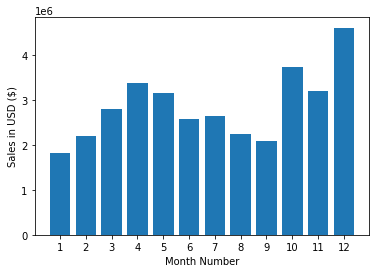

In [39]:
# visulize as a bar chart to show the trend more clearly
import matplotlib.pyplot as plt
months= range(1,13)  # 13 is exclusive, show month 1-12
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.bar(months,results['Sales'])
plt.show()

#### Question2: What city had the highest number of sales?  

In [45]:
results=all_data.groupby('City').sum()
results                                    
# from the above results we can tell that 'San Francisco CA' had the highest sales. 

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


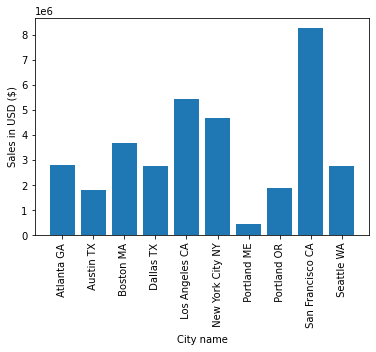

In [56]:
# plot it. 
import matplotlib.pyplot as plt
# cities= all_data['City'].unique()   # the issue is when we grab the unique cities from all_data of 'city' column the order changes with respect to the y (sale) value. 
# how to solve it? (solution from stackoverflow)
cities= [city for city,df in all_data.groupby('City')]

tickvalues=range(0,len(cities))
plt.xticks(ticks=tickvalues,rotation='vertical')
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.bar(cities,results['Sales'])
plt.show()

# found an issue here:  the bar chart shows that 'Austin TX' is the city that had the highest sales. but the table we 
# generated above implies that 'San Francisco CA' had the highest sales. 




#### Question3: What time should we diplay advertisements to maximize likelihood of cusmtomer`s buying product? 

In [75]:
# use the 'Order Date' to grab the hour and minute, then look at the frequence/distribution by hours. 
# show a line chart this time. 
# convert the type of 'Order Date' to datetime type
# first check what type is col 'Order Date' is?  It is a python object type. 
df= pd.DataFrame(all_data)
datatype=df.dtypes['Order Date']
datatype     

all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()
# now grab the hour and minute 
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minute,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,9,27


NameError: name 'plot' is not defined

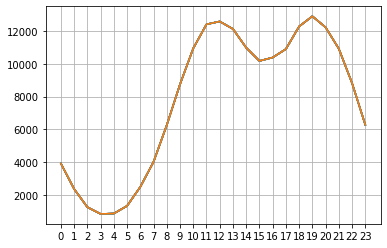

In [81]:
# plot a line chart 
hours =[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plot.show()   
# 11am and 7pm are peak order placed time. 
# error: plot is not defined??  